In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsRetirementModel import RetirementConsumerType

/home/alujan/mambaforge-pypy3/envs/egmn-dev/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
agent = RetirementConsumerType()

In [3]:
agent.solve()

In [4]:
def plot_retired(min, max, n=100):
    plt.figure(figsize=(15, 6))

    mgrid = np.linspace(min, max, n)

    plt.subplot(1, 3, 1)
    plt.title("consumption")
    for c_func in c_func_retired:
        plt.plot(mgrid, c_func(mgrid))

    plt.subplot(1, 3, 2)
    plt.title("inverse vp_func")
    for vp_func in vp_func_retired:
        plt.plot(mgrid, vp_func.cFunc(mgrid))

    plt.subplot(1, 3, 3)
    plt.title("inverse v_func")
    for v_func in v_func_retired:
        plt.plot(mgrid, v_func.vFuncNvrs(mgrid))

    plt.show()

In [5]:
def plot_3d_func(func, min, max, n=100):
    xgrid = np.linspace(min, max, n)
    ygrid = xgrid

    xmat, ymat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zmat = func(xmat, ymat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xmat, ymat, zmat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel("m")
    ax.set_ylabel("n")
    ax.set_zlabel("f")
    plt.show()

In [6]:
solution = agent.solution
size = len(solution)
retired_solution = [solution[t].retired_solution for t in range(size)]
worker_solution = [solution[t].worker_solution for t in range(size)]
working_solution = [solution[t].working_solution for t in range(size)]
retiring_solution = [solution[t].retiring_solution for t in range(size)]

# Retired

c_func_retired = [retired_solution[t].c_func for t in range(size)]
vp_func_retired = [retired_solution[t].vp_func for t in range(size)]
v_func_retired = [retired_solution[t].v_func for t in range(size)]

# Worker

c_func_worker = [worker_solution[t].deposit_stage.c_func for t in range(size)]
d_func_worker = [worker_solution[t].deposit_stage.d_func for t in range(size)]
dvdm_func_worker = [worker_solution[t].deposit_stage.dvdm_func for t in range(size)]
dvdn_func_worker = [worker_solution[t].deposit_stage.dvdn_func for t in range(size)]
v_func_worker = [worker_solution[t].deposit_stage.v_func for t in range(size)]
prbWrk_func_worker = [
    worker_solution[t].probabilities.prob_working for t in range(size)
]
prbRet_func_worker = [
    worker_solution[t].probabilities.prob_retiring for t in range(size)
]

# Working

# Post Decision

dvda_func_working = [
    working_solution[t].post_decision_stage.dvda_func for t in range(size)
]
dvdb_func_working = [
    working_solution[t].post_decision_stage.dvdb_func for t in range(size)
]
v_pd_func_working = [
    working_solution[t].post_decision_stage.v_func for t in range(size)
]

# Consumption Stage

c_cs_func_working = [working_solution[t].consumption_stage.c_func for t in range(size)]
dvdl_cs_func_working = [
    working_solution[t].consumption_stage.dvdl_func for t in range(size)
]
dvdb_cs_func_working = [
    working_solution[t].consumption_stage.dvdb_func for t in range(size)
]
v_cs_func_working = [working_solution[t].consumption_stage.v_func for t in range(size)]

# Deposit Stage

c_func_working = [working_solution[t].deposit_stage.c_func for t in range(size)]
d_func_working = [working_solution[t].deposit_stage.d_func for t in range(size)]
dvdm_func_working = [working_solution[t].deposit_stage.dvdm_func for t in range(size)]
dvdn_func_working = [working_solution[t].deposit_stage.dvdn_func for t in range(size)]
v_func_working = [working_solution[t].deposit_stage.v_func for t in range(size)]

# Retiring

c_func_retiring = [retiring_solution[t].c_func for t in range(size)]
vp_func_retiring = [retiring_solution[t].vp_func for t in range(size)]
vp_func_retiring = [retiring_solution[t].vp_func for t in range(size)]
v_func_retiring = [retiring_solution[t].v_func for t in range(size)]

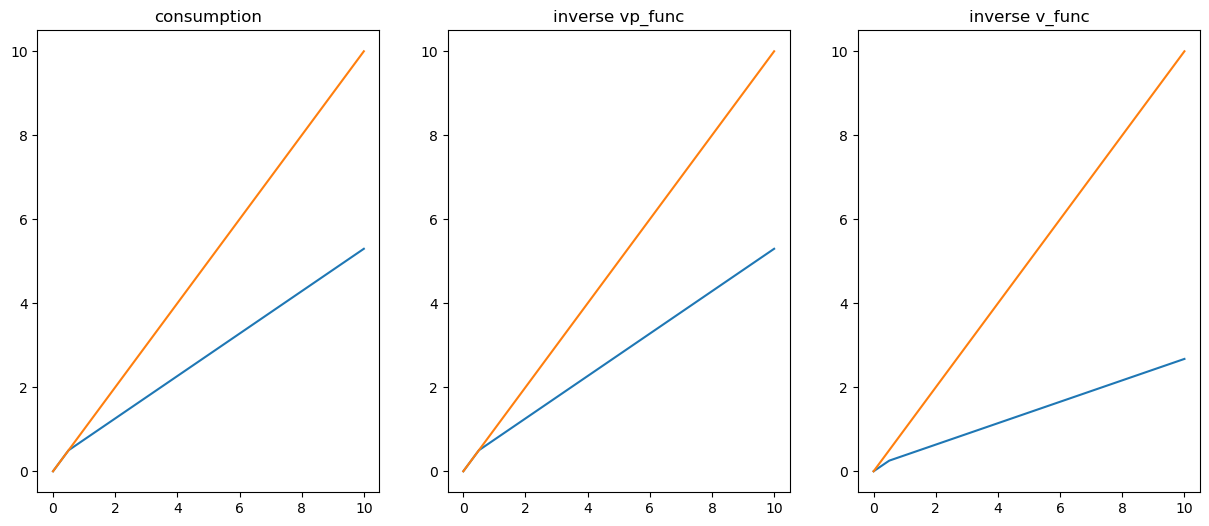

In [7]:
plot_retired(0, 10)

In [8]:
t = 0

# Working


## Post Decision Stage


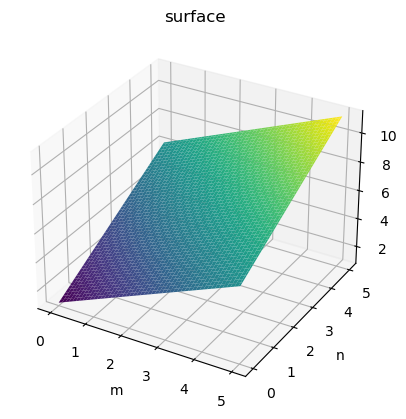

In [9]:
# wa
plot_3d_func(dvda_func_working[t].cFunc, 0.0, 5)

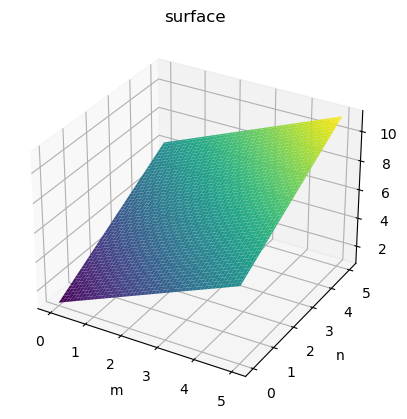

In [10]:
# wb
plot_3d_func(dvdb_func_working[t].cFunc, 0.0, 5)

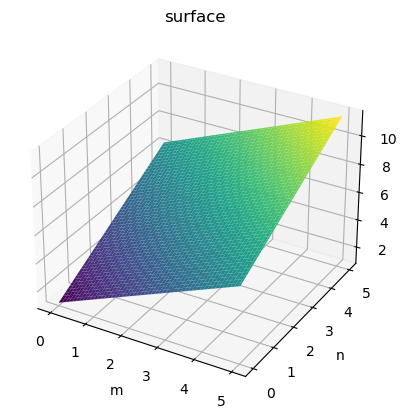

In [11]:
# w
plot_3d_func(v_pd_func_working[t].vFuncNvrs, 0.0, 5)

## Consumption Stage


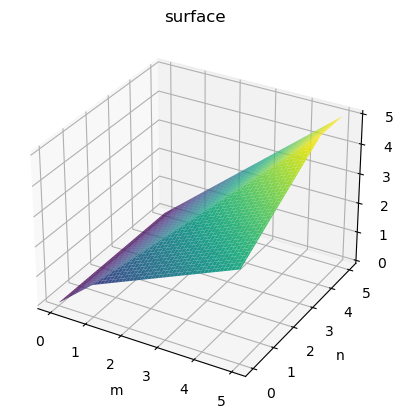

In [12]:
plot_3d_func(c_cs_func_working[t], 0.0, 5)

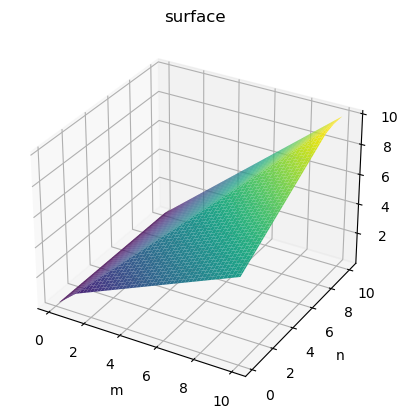

In [13]:
plot_3d_func(dvdl_cs_func_working[t].cFunc, 0.1, 10)

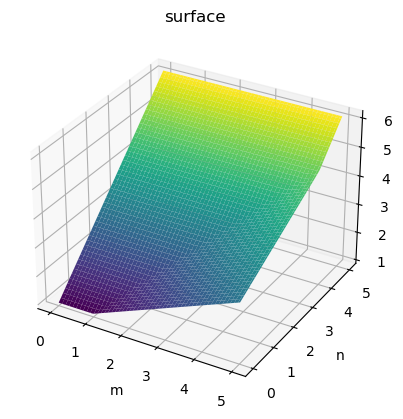

In [14]:
plot_3d_func(dvdb_cs_func_working[t].cFunc, 0.0, 5)

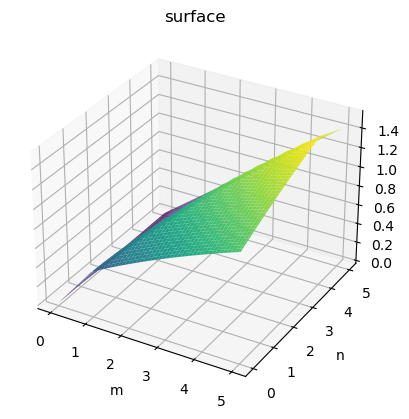

In [15]:
plot_3d_func(v_cs_func_working[t].vFuncNvrs, 0.0, 5)

## Deposit Stage


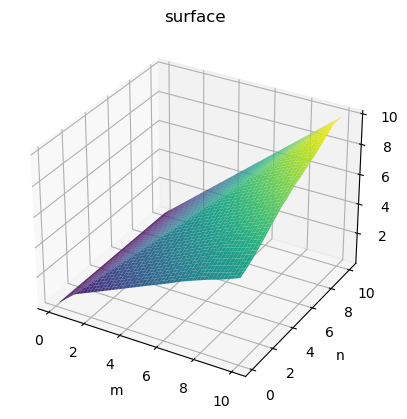

In [16]:
plot_3d_func(c_func_working[t], 0.1, 10)

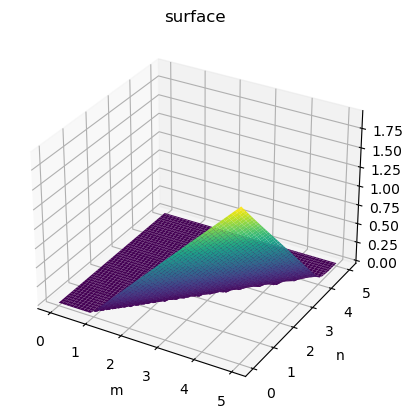

In [17]:
plot_3d_func(d_func_working[t], 0.0, 5)

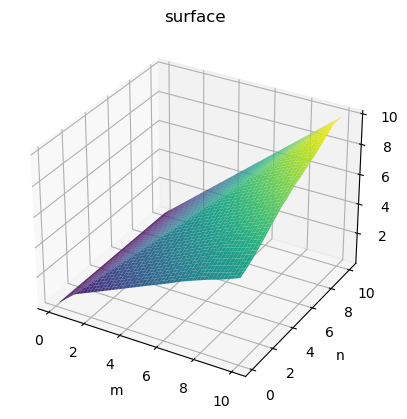

In [18]:
plot_3d_func(dvdm_func_working[t].cFunc, 0.1, 10)

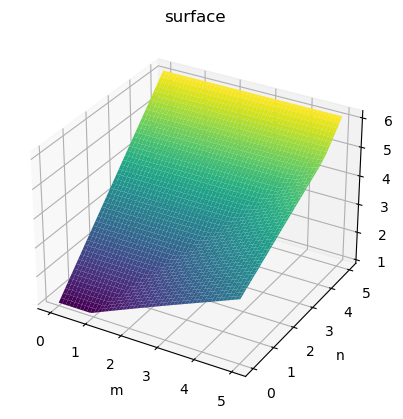

In [19]:
plot_3d_func(dvdn_func_working[t].cFunc, 0.0, 5)

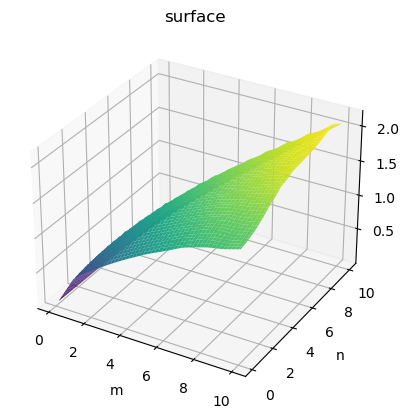

In [20]:
plot_3d_func(v_func_working[t].vFuncNvrs, 0.1, 10)

# Retiring


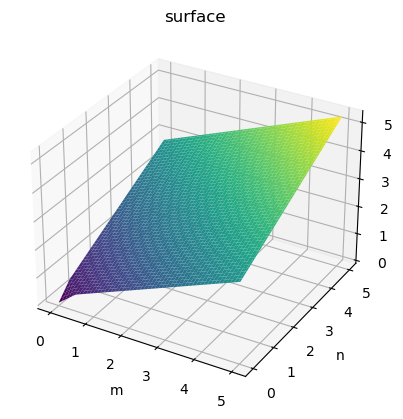

In [21]:
plot_3d_func(c_func_retiring[t], 0.0, 5)

/home/alujan/mambaforge-pypy3/envs/egmn-dev/lib/python3.10/site-packages/HARK/rewards.py:66: RuntimeWarning: divide by zero encountered in power
  return c**-rho
/home/alujan/mambaforge-pypy3/envs/egmn-dev/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


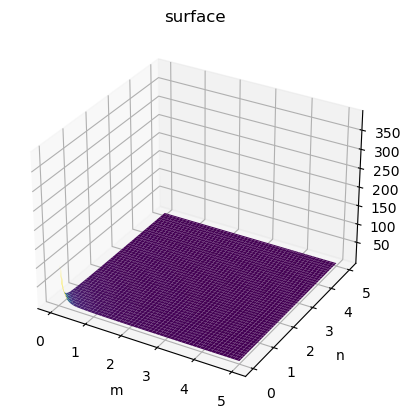

In [22]:
plot_3d_func(vp_func_retiring[t], 0.0, 5)

/home/alujan/mambaforge-pypy3/envs/egmn-dev/lib/python3.10/site-packages/HARK/rewards.py:40: RuntimeWarning: divide by zero encountered in reciprocal
  return c ** (1.0 - rho) / (1.0 - rho)


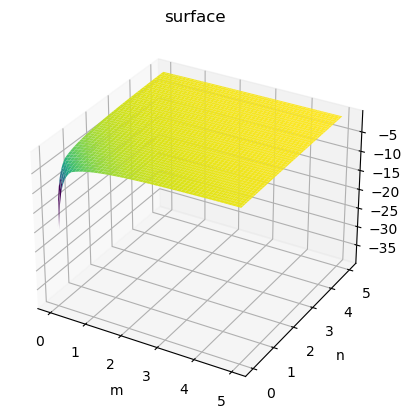

In [23]:
plot_3d_func(v_func_retiring[t], 0.0, 5)

# Worker


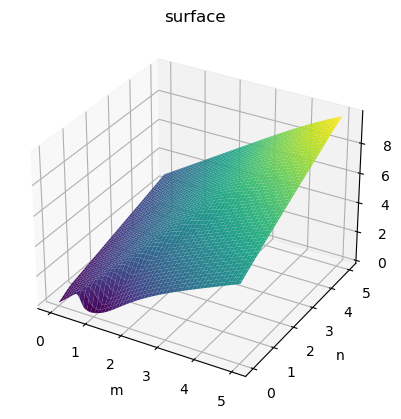

In [24]:
plot_3d_func(c_func_worker[t], 0.0, 5)

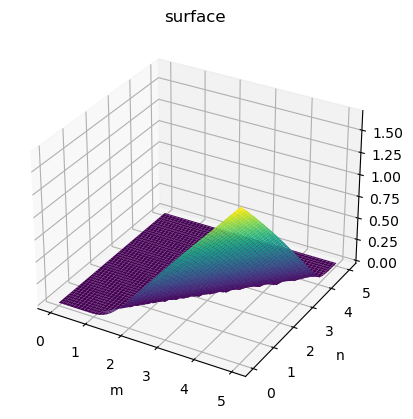

In [25]:
plot_3d_func(d_func_worker[t], 0.0, 5)

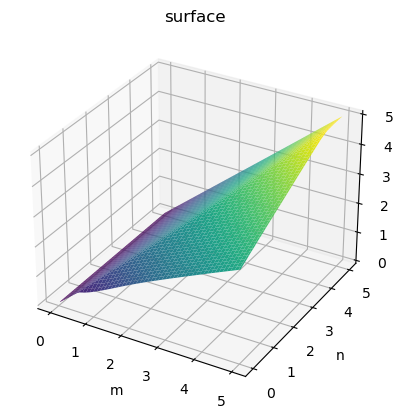

In [26]:
plot_3d_func(dvdm_func_worker[t].cFunc, 0.0, 5)

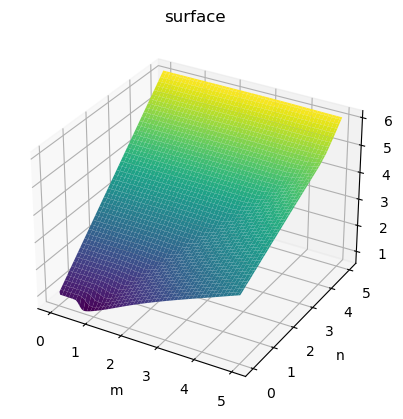

In [27]:
plot_3d_func(dvdn_func_worker[t].cFunc, 0.0, 5)

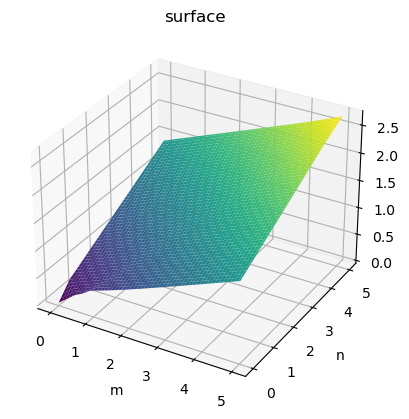

In [28]:
plot_3d_func(v_func_worker[t].vFuncNvrs, 0.0, 5)

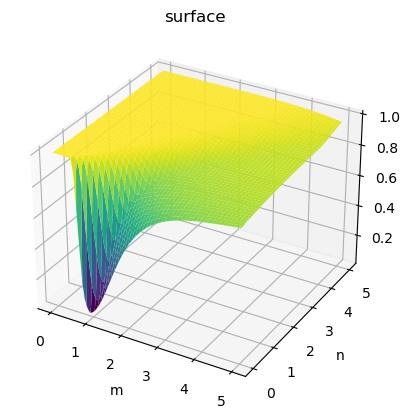

In [29]:
plot_3d_func(prbWrk_func_worker[t], 0.0, 5)

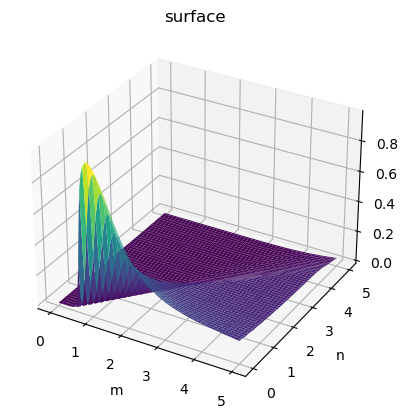

In [30]:
plot_3d_func(prbRet_func_worker[t], 0.0, 5)

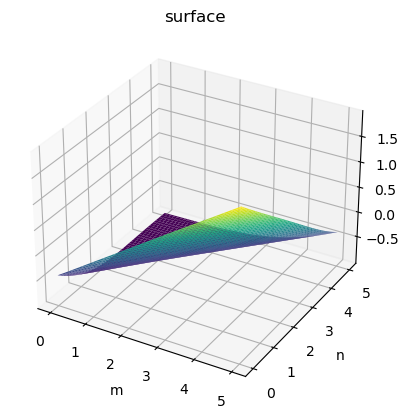

In [31]:
plot_3d_func(agent.solution[0].working_solution.deposit_stage.interp, 0, 5)

In [32]:
def scatter_hist(x, y, color, ax, ax_histx, ax_histy, fig):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    plot = ax.scatter(x, y, c=color, cmap="jet")
    fig.colorbar(plot)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(x), np.max(y))
    xymin = min(np.min(x), np.min(y))
    top = (int(xymax / binwidth) + 1) * binwidth
    bottom = (int(xymin / binwidth) + 1) * binwidth

    bins = np.arange(bottom, top + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

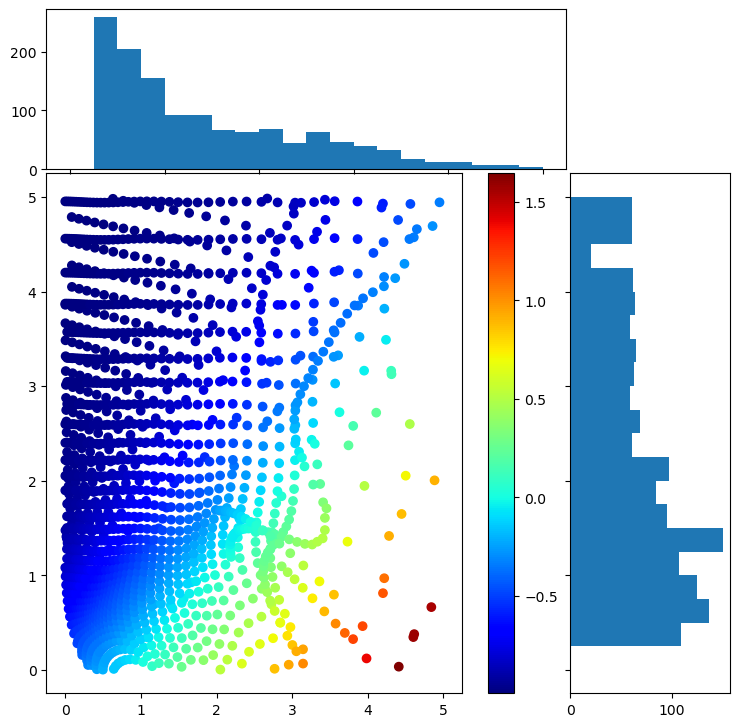

In [33]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

x = agent.solution[0].working_solution.deposit_stage.interp.grids[0]
y = agent.solution[0].working_solution.deposit_stage.interp.grids[1]
color = agent.solution[0].working_solution.deposit_stage.interp.values

cond = np.logical_and.reduce([x > 0, y > 0, x < 5, y < 5])
x = x[cond]
y = y[cond]
color = color[cond]

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, color, ax, ax_histx, ax_histy, fig)